In [46]:
from scipy import fftpack
import numpy as np
import pylab as P
import radialProfile
import pywt
 
def powerSpecturm(data):
    
    image = np.byte(255 * (data - data.min()) / (data.max() - data.min()))
    image = data
# Take the fourier transform of the image.
    F1 = fftpack.fft2(image)
 
# Now shift the quadrants around so that low spatial frequencies are in
# the center of the 2D fourier transformed image.
    F2 = fftpack.fftshift( F1 )
 
# Calculate a 2D power spectrum
    psd2D = np.abs( F2 )**2
 
# Calculate the azimuthally averaged 1D power spectrum
    psd1D = radialProfile.azimuthalAverage(psd2D)
    
    return psd1D
 
#
# pywt.wavelist(family=None, kind='discrete')

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8',
 'coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17',
 'db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38',
 'dmey',
 'haar',
 'rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',
 'rbio3.3',
 'rbio3.5',
 'rbio3.7',
 'rbio3.9',
 'rbio4.4',
 'rbio5.5',
 'rbio6.8',
 'sym2',
 'sym3',
 'sym4',
 'sym5',
 'sym6',
 'sym7',
 'sym8',
 'sym9',
 'sym10',
 'sym11',
 'sym12',
 'sym13',

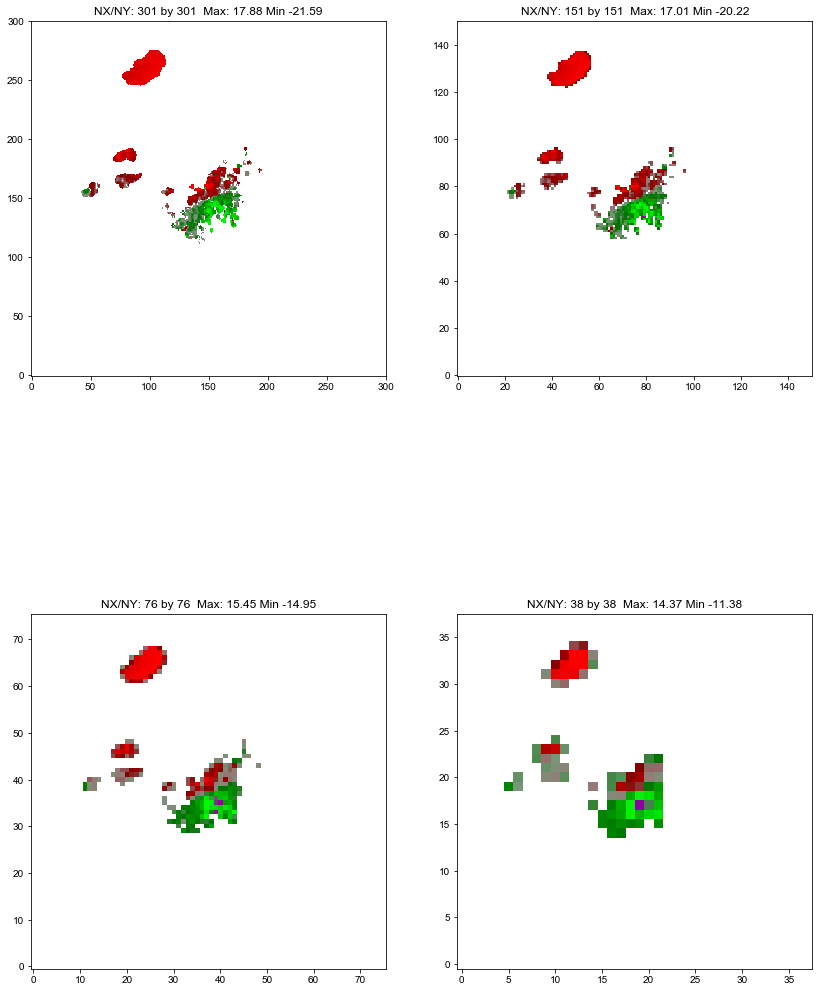

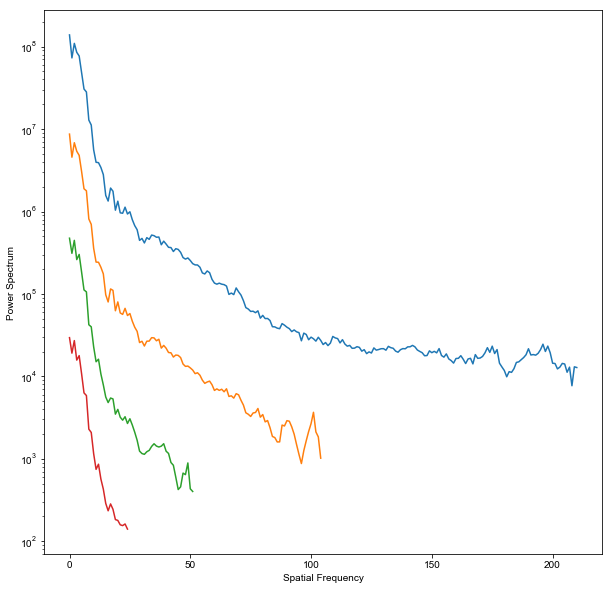

In [52]:
import pylab as P
from pyart.graph import cm


_method = 'haar'

filename = "obs_seq_KFDR_20170516_230237.nc"

im   = ncdf.Dataset("/Users/Louis.Wicker/pyOPAWS/out_1km/"+filename)
data = (im.variables['VEL'][0]).filled(0.0)

arr = data
psd1D = []
# arr = np.pad(arr, (90, 89), 'reflect')
# print arr.shape

P.figure(figsize = (14,20))

ax = P.subplot(221)
P.imshow(np.ma.masked_array(data, np.abs(data) < 0.5), origin='lower', cmap=cm.NWSVel)
P.title("NX/NY: %d by %d  Max: %4.2f Min %4.2f" % (data.shape[0], data.shape[1], data.max(), data.min()))
psd1D.append(powerSpecturm(data))

saveWave = []

for n in np.arange(3):
    coeffs = pywt.dwt2(arr, _method)
    cA, (cH, cV, cD) = coeffs
    dd = (cA/(2**(n+1)))
    psd1D.append(powerSpecturm(dd))
    ax = P.subplot(222+n)
    P.imshow(np.ma.masked_array(dd, np.abs(dd) < 0.5),origin='lower', cmap=cm.NWSVel)
    P.title("NX/NY: %d by %d  Max: %4.2f Min %4.2f" % (dd.shape[0], dd.shape[1], dd.max(), dd.min()))
#     ax = P.subplot(424+n)
#     P.semilogy( psf1D )
#     P.xlabel('Spatial Frequency')
#     P.ylabel('Power Spectrum')

    saveWave.append(dd)
    arr = cA
    
    
P.show()

P.figure(figsize = (10,10))
for n in np.arange(4):
    P.semilogy( psd1D[n] )
P.xlabel('Spatial Frequency')
P.ylabel('Power Spectrum')
P.show()

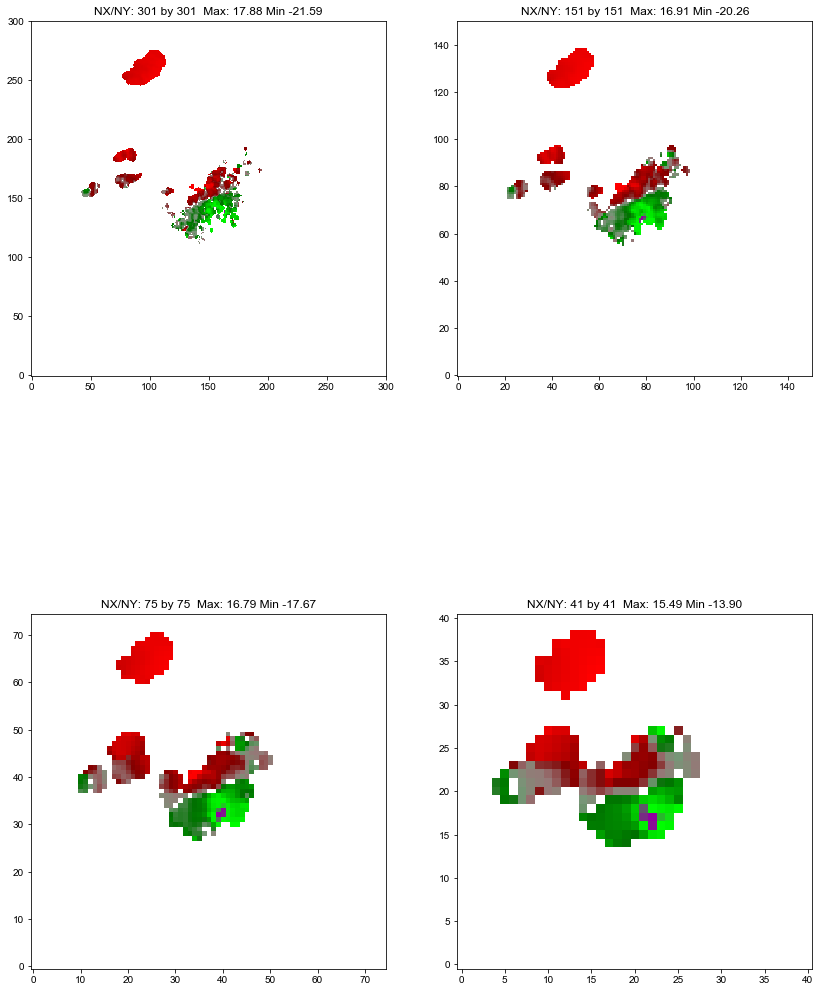

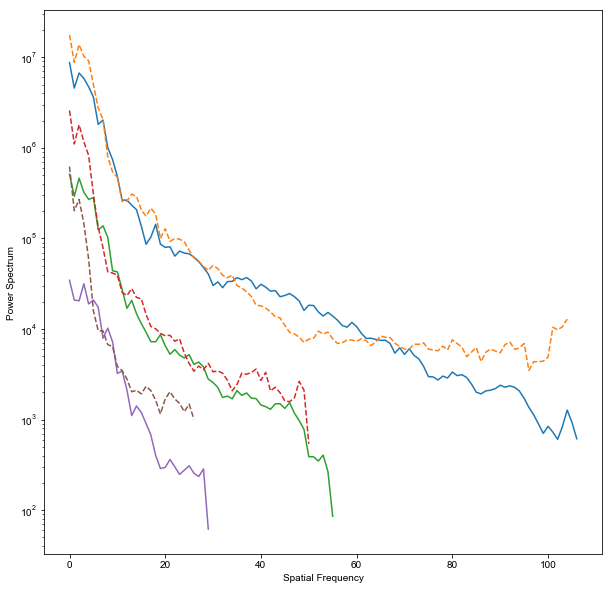

In [51]:
plt.figure(figsize = (14,20))

Csd1D = []

ax = plt.subplot(221)

im   = ncdf.Dataset("/Users/Louis.Wicker/pyOPAWS/out_1km/"+filename)
dd   = (im.variables['VEL'][0]).filled(0.0)

Csd1D.append(powerSpecturm(dd))


P.imshow(np.ma.masked_array(dd, np.abs(dd) < 0.5),origin='lower', cmap=cm.NWSVel)
P.title("NX/NY: %d by %d  Max: %4.2f Min %4.2f" % (dd.shape[0], dd.shape[1], dd.max(), dd.min()))

ax   = plt.subplot(222)
im   = ncdf.Dataset("/Users/Louis.Wicker/pyOPAWS/out_2km/"+filename)
dd   = (im.variables['VEL'][0]).filled(0.0)
Csd1D.append(powerSpecturm(dd))

P.imshow(np.ma.masked_array(dd, np.abs(dd) < 0.5),origin='lower', cmap=cm.NWSVel)
P.title("NX/NY: %d by %d  Max: %4.2f Min %4.2f" % (dd.shape[0], dd.shape[1], dd.max(), dd.min()))

ax = plt.subplot(223)

im   = ncdf.Dataset("/Users/Louis.Wicker/pyOPAWS/out_4km/"+filename)
dd   = (im.variables['VEL'][0]).filled(0.0)
Csd1D.append(powerSpecturm(dd))

P.imshow(np.ma.masked_array(dd, np.abs(dd) < 0.5),origin='lower', cmap=cm.NWSVel)
P.title("NX/NY: %d by %d  Max: %4.2f Min %4.2f" % (dd.shape[0], dd.shape[1], dd.max(), dd.min()))

ax = plt.subplot(224)

im   = ncdf.Dataset("/Users/Louis.Wicker/pyOPAWS/out_8km/"+filename)
dd   = (im.variables['VEL'][0]).filled(0.0)
Csd1D.append(powerSpecturm(dd))

P.imshow(np.ma.masked_array(dd, np.abs(dd) < 0.5),origin='lower', cmap=cm.NWSVel)
P.title("NX/NY: %d by %d  Max: %4.2f Min %4.2f" % (dd.shape[0], dd.shape[1], dd.max(), dd.min()))

P.show()

P.figure(figsize = (10,10))
for n in np.arange(1,4):
    P.semilogy( psd1D[n] )
    P.semilogy( Csd1D[n], '----' )
P.xlabel('Spatial Frequency')
P.ylabel('Power Spectrum')
P.show()

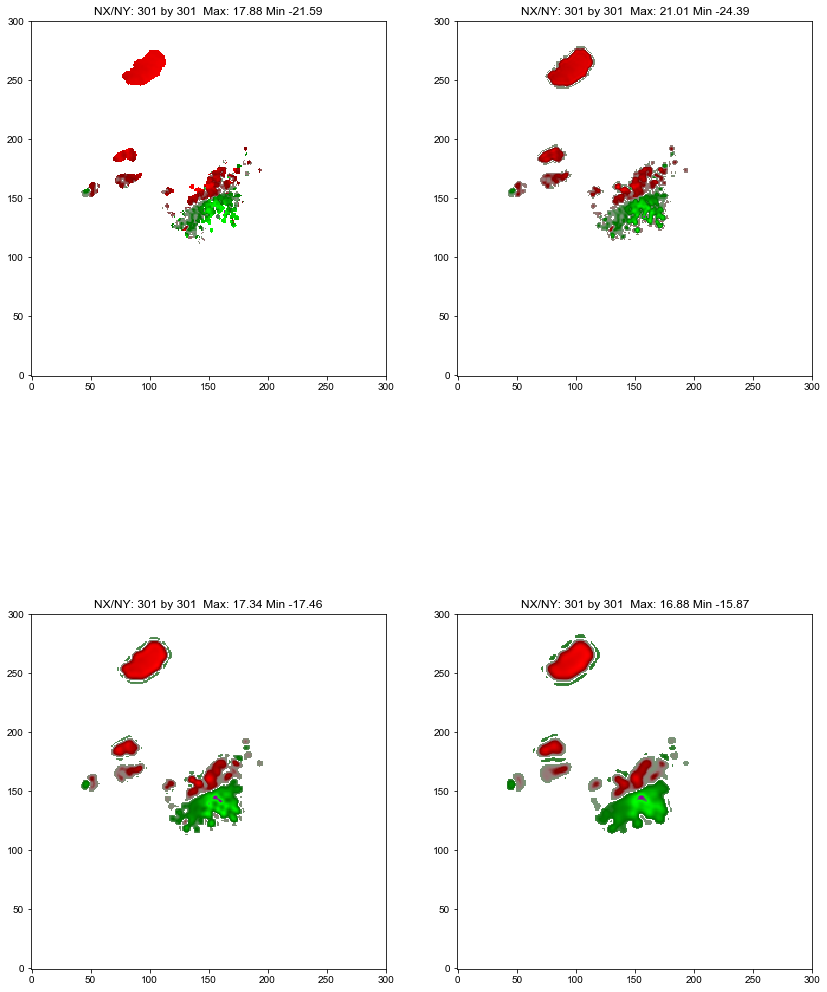

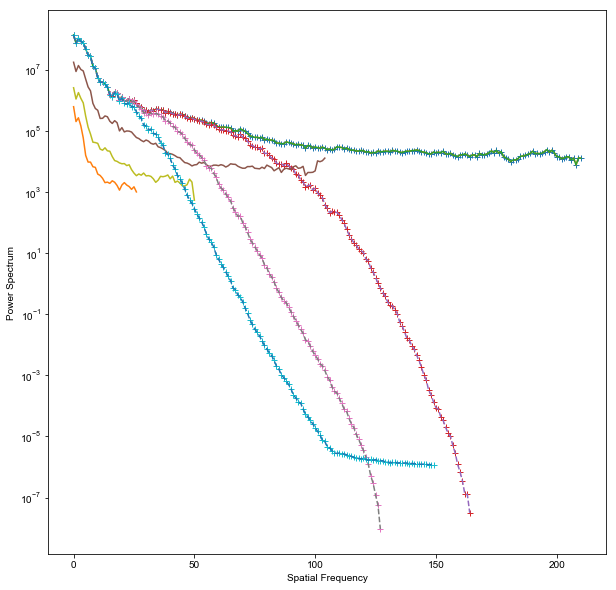

In [35]:
from raymond_lowpass import raymond2d_lowpass

im   = ncdf.Dataset("/Users/Louis.Wicker/pyOPAWS/out_1km/"+filename)
data = (im.variables['VEL'][0]).filled(0.0)

arr = data
Rpsd1D = []
# arr = np.pad(arr, (90, 89), 'reflect')
# print arr.shape

P.figure(figsize = (14,20))

ax = P.subplot(221)
P.imshow(np.ma.masked_array(data, np.abs(data) < 0.5), origin='lower', cmap=cm.NWSVel)
P.title("NX/NY: %d by %d  Max: %4.2f Min %4.2f" % (data.shape[0], data.shape[1], data.max(), data.min()))
Rpsd1D.append(powerSpecturm(data))

saveWave = []
eps = [1.0, 100., 1000.]

for n in np.arange(3):
    
    dd = raymond2d_lowpass(data, eps[n])
    Rpsd1D.append(powerSpecturm(dd))
    ax = P.subplot(222+n)
    P.imshow(np.ma.masked_array(dd, np.abs(dd) < 0.5),origin='lower', cmap=cm.NWSVel)
    P.title("NX/NY: %d by %d  Max: %4.2f Min %4.2f" % (dd.shape[0], dd.shape[1], dd.max(), dd.min()))

    saveWave.append(dd)
    
    
P.show()

P.figure(figsize = (10,10))
for n in np.arange(4):
    P.semilogy( Rpsd1D[n] , '+' )
    P.semilogy( psd1D[n], '----')
    P.semilogy( Csd1D[n] )

P.xlabel('Spatial Frequency')
P.ylabel('Power Spectrum')
P.show()
